In [1]:
%matplotlib inline

from feature_filling import *
from implementations import *
from helpers import *
from utils import *

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
y, X, ids = load_csv_data(path="train.csv")

print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [3]:
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [4]:
X[np.where(X == -999)] = 0
X

array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,   0.   ,   0.   ,  46.226],
       [  0.   , 162.172, 125.953, ...,   0.   ,   0.   ,  44.251],
       ...,
       [105.457,  60.526,  75.839, ...,   0.   ,   0.   ,  41.992],
       [ 94.951,  19.362,  68.812, ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,  72.756,  70.831, ...,   0.   ,   0.   ,   0.   ]])

In [5]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.8)

print("Training data shapes", x_tr.shape, y_tr.shape)
print("Validation data shapes", x_val.shape, y_val.shape)

Training data shapes (200000, 30) (200000,)
Validation data shapes (50000, 30) (50000,)


In [6]:
x_tr, y_tr = remove_outliers(x_tr,y_tr)

In [7]:
# Columns_With_Missing_Features, Feature_Median = calculate_feature_medians(x_tr)
# x_tr=fill_features_with_median(x_tr,Columns_With_Missing_Features,Feature_Median)
# x_val=fill_features_with_median(x_val,Columns_With_Missing_Features,Feature_Median)

In [7]:
x_tr, _, _ = standardize(x_tr)
x_val, _, _ = standardize(x_val)

## Train

In [8]:
weights, loss = logistic_regression(
    y_tr, add_bias_term(x_tr), np.zeros(x_tr.shape[1] + 1), max_iters=3000, gamma=0.1, bias_term=True)

In [9]:
print("Loss is", loss)

Loss is 0.5203662834820775


In [10]:
compute_score(y_val,add_bias_term(x_val),weights)

0.7402

In [12]:
### cross validation
gammas=[0.0001, 0.01, 0.05, 0.1, 0.5]
best_score = 0
lambda_best = -1
for g in gammas:
    accuracies = []
    for train, test in kfolds(y.shape[0],4):
        x_tr, y_tr = standardize(X[train])[0], y[train]
        weights, loss = logistic_regression(y_tr, x_tr, np.zeros(x_tr.shape[1]), max_iters=2000, gamma=g)
        
        x_val, y_val = standardize(X[test])[0], y[test]
        accuracy = compute_score(y_val,x_val,weights)
        accuracies.append(accuracy)
        print(loss,accuracy)
    mean = sum(accuracies) / len(accuracies)
    print('Mean with gamma =', g, mean)
    if mean > best_score:
        best_score = mean
        lambda_best = g

print("The best performance is achieved when lambda= " + str(lambda_best) + " and the accuracy score with it is", best_score)

0.6621474202602284 0.6908
0.662169057821468 0.6885
0.6620639867896845 0.6854
0.6620951485865851 0.6849
Mean with gamma = 0.0001 0.6874
0.5528872680332564 0.6979
0.5526977213592122 0.6927
0.5528027095951247 0.6887
0.5532058978379512 0.7049
Mean with gamma = 0.01 0.69605
0.5291214829357108 0.741
0.5286498819262676 0.7329
0.5289141676446464 0.7325
0.5287500672056056 0.7317
Mean with gamma = 0.05 0.734525
0.5256192461187579 0.743
0.5254105867969192 0.7396
0.5257977855483753 0.742
0.5257331944414482 0.7439
Mean with gamma = 0.1 0.742125
0.5224199154313958 0.7417
0.5221727618723229 0.7416
0.5223553009262326 0.7402
0.5229757831242691 0.7501
Mean with gamma = 0.5 0.7434000000000001
The best performance is achieved when lambda= 0.5 and the accuracy score with it is 0.7434000000000001


In [ ]:
### cross validation
lambdas=[0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000]
best_score = 0
lambda_best = -1
for lam in lambdas:
    accuracies = []
    for train, test in kfolds(y.shape[0]):
        x_tr, y_tr = standardize(X[train])[0], y[train]
        weights, _ = reg_logistic_regression(
            y_tr, add_bias_term(x_tr), lam, np.random.random(x_tr.shape[1] + 1), 
            max_iters=1000, gamma=0.05, bias_term=True)
        
        x_val, y_val = standardize(X[test])[0], y[test]
        accuracies.append(compute_score(y_val, add_bias_term(x_val), weights))
    
    mean = sum(accuracies) / len(accuracies)
    print('Mean with lambda =', lam, mean)
    if mean > best_score:
        best_score = mean
        lambda_best = lam

print("The best performance is achieved when lambda= " + str(lambda_best) + " and the accuracy score with it is", best_score)

## Evaluate

In [10]:
print("Validation score is", compute_score(y_val, add_bias_term(x_val), weights))

Validation score is 0.626


In [ ]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.75)
x_tr, _, _ = standardize(x_tr)
x_val, _, _ = standardize(x_val)
#x_tr = add_bias_term(x_tr)
#x_val = add_bias_term(x_val)

train_error, val_error = [], []
n = y_tr.shape[0]
lambda_ = 0.1
for i in range(10, 50000, 40):
    x_tr_i = x_tr[:i]
    y_tr_i = y_tr[:i]
    clf = LogisticRegression(random_state=0, max_iter=1000, C=1 / lambda_).fit(x_tr_i, y_tr_i)
    
    '''weights, loss = logistic_regression(
        y_tr_i, x_tr_i, np.random.random(x_tr_i.shape[1]), 
            max_iters=200, gamma=0.005, epsilon=10e-2, bias_term=True)'''
    
    weights = clf.coef_.T
    train_error.append(cross_entropy_loss(y_tr_i, x_tr_i, weights))
    val_error.append(cross_entropy_loss(y_val, x_val, weights))
    
    if (i % 1000 == 0):
        print(i)

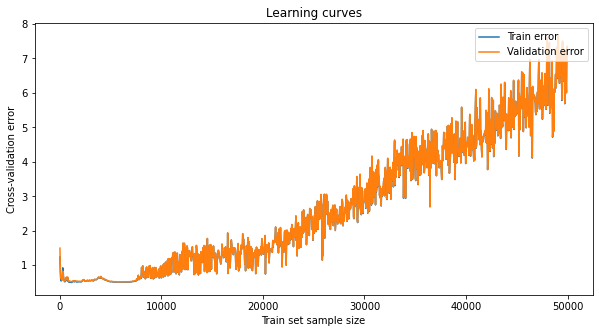

In [31]:
fig = plt.figure(figsize = (10,5))
plt.plot(np.arange(10, 50000, 40), train_error, label= 'Train error')
plt.plot(np.arange(10, 50000, 40), val_error, label= 'Validation error')
plt.xlabel('Train set sample size')
plt.ylabel('Cross-validation error')
plt.legend(loc="upper right")
plt.title('Learning curves')
plt.show()

### Check what's going on with error

In [32]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.8)
x_tr, _, _ = standardize(x_tr)
x_val, _, _ = standardize(x_val)

In [34]:
clf = LogisticRegression(random_state=0, max_iter=2000, C=10).fit(x_tr, y_tr)

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
clf.score(x_val, y_val)

0.74296

In [36]:
clf.coef_.T.shape

(30, 1)

In [46]:
cross_entropy_loss(y_tr, x_tr, clf.coef_.T, lambda_=0.1)

0


C:\Users\Korisnik\OneDrive\Desktop\EPFL\Machine Learning\Project 1\ml-project-1-zml\utils.py:66: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Korisnik\OneDrive\Desktop\EPFL\Machine Learning\Project 1\ml-project-1-zml\utils.py:66: RuntimeWarning: invalid value encountered in matmul
  


array([nan])

In [47]:
compute_score(y_tr, x_tr, clf.coef_.T)

0.342245

In [52]:
(y_tr == 0).sum()

131551

In [53]:
(y_tr == 1).sum()

68449

In [60]:
(clf.predict(x_tr) == y_tr).sum() / y_tr.shape[0]

0.74256

In [61]:
clf = LogisticRegression(random_state=0, max_iter=2000, C=10, verbose=1).fit(x_tr, y_tr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.4s finished


In [64]:
from sklearn.metrics import log_loss
logloss = log_loss(y_tr, clf.predict(x_tr))
logloss

8.891726934713025